<a href="https://colab.research.google.com/github/Charana04/Financial-Risk-Analysis-for-Investment-Portfolios/blob/main/Financial_Risk_Analysis_for_Investment_Portfolios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install yfinance
!pip install yfinance


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Define the stocks and date range
tickers = ['AAPL', 'MSFT', 'AMZN']  # Apple, Microsoft, Amazon
start_date = '2020-01-01'
end_date = '2023-12-31'

# Fetch data
try:
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    print("Data fetched successfully!")
except Exception as e:
    print(f"Error fetching data: {e}")

# Display the first few rows
data.head()


[*********************100%***********************]  3 of 3 completed

Data fetched successfully!


Ticker,AAPL,AMZN,MSFT
Date,,,
2020-01-02,72.796013,94.900497,153.630692
2020-01-03,72.088303,93.748497,151.717712
2020-01-06,72.662720,95.143997,152.109924
2020-01-07,72.320976,95.343002,150.722961
2020-01-08,73.484360,94.598503,153.123749


In [ ]:
# Handle missing values
data = data.fillna(method='ffill').fillna(method='bfill')

# Normalize data
normalized_data = data / data.iloc[0]
normalized_data.head()


<ipython-input-11-0e41a9ca1128>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill').fillna(method='bfill')


Ticker,AAPL,AMZN,MSFT
Date,,,
2020-01-02,1.000000,1.000000,1.000000
2020-01-03,0.990278,0.987861,0.987548
2020-01-06,0.998169,1.002566,0.990101
2020-01-07,0.993474,1.004663,0.981073
2020-01-08,1.009456,0.996818,0.996700


In [ ]:
# Calculate daily returns
daily_returns = normalized_data.pct_change().dropna()

# Calculate annualized volatility
volatility = daily_returns.std() * (252 ** 0.5)  # 252 trading days in a year
print("Annualized Volatility:")
print(volatility)


Annualized Volatility:
Ticker
AAPL    0.335681
AMZN    0.376880
MSFT    0.326155
dtype: float64


In [ ]:
# Calculate 5% Value at Risk (VaR)
VaR_95 = daily_returns.quantile(0.05)
print("Value at Risk (95% confidence):")
print(VaR_95)


Value at Risk (95% confidence):
Ticker
AAPL   -0.032406
AMZN   -0.035522
MSFT   -0.029482
Name: 0.05, dtype: float64


<Figure size 1000x600 with 0 Axes>

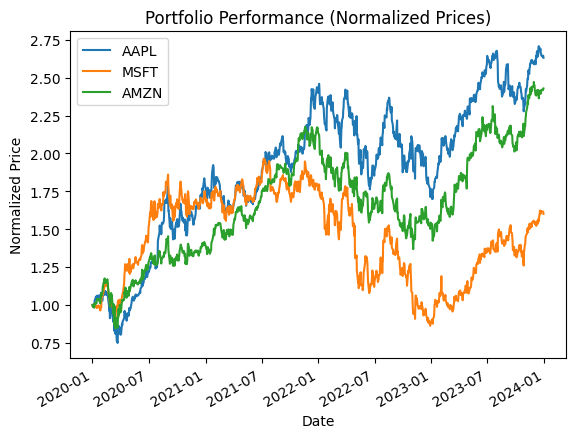

In [ ]:
# Plot normalized prices
plt.figure(figsize=(10, 6))
normalized_data.plot()
plt.title("Portfolio Performance (Normalized Prices)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend(tickers)
plt.show()


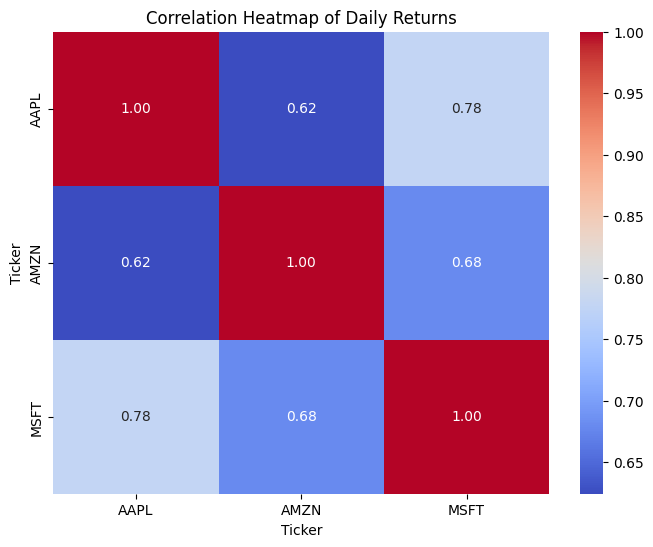

In [ ]:
# Correlation heatmap of daily returns
plt.figure(figsize=(8, 6))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Daily Returns")
plt.show()


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save metrics to a CSV file
metrics = pd.DataFrame({'Volatility': volatility, 'VaR_95': VaR_95})
metrics.to_csv('/content/drive/My Drive/Risk_Metrics_Report.csv', index=True)
print("Metrics saved to Google Drive!")


Mounted at /content/drive
Metrics saved to Google Drive!
